In [1]:
import os
import time
import h5py
import math
import numpy as np
import pyfftw as ft
import matplotlib
import matplotlib.pyplot as plt
import pyJHTDB
from pyJHTDB.dbinfo import isotropic1024coarse
from pyJHTDB import libJHTDB

In [2]:
N = 1024

In [4]:
start = time.time()

wiz = ('(fftw-3.3.5 fftw_wisdom #x3c273403 #x192df114 #x4d08727c #xe98e9b9d\n)\n','(fftw-3.3.5 fftwf_wisdom #x706526c0 #x2f8b6c85 #x8cd1bb1a #x7c96e03d\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x0478d9e6 #xffc458b2 #xefeba0c5 #xe8fb2e05)\n  (fftwf_dft_buffered_register 1 #x11bdd #x11bdd #x0 #xb6380734 #x8d827d8e #xdc067a28 #x4fc763de)\n  (fftwf_rdft_rank0_register 2 #x10bdd #x10bdd #x0 #xf3c0402e #xf303d9aa #xbdc22798 #xd9510af9)\n  (fftwf_rdft2_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x1a3fc773 #x16826a6d #x4ac1ba9b #x71705541)\n  (fftwf_codelet_hc2cf2_8 0 #x11bdd #x11bdd #x0 #xa3aa3245 #xfa89ad84 #x6f51d136 #x21269ea8)\n  (fftwf_codelet_hc2cb_8 0 #x10bdd #x10bdd #x0 #x48259488 #x196c8c29 #x37f91b06 #x556264da)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb27d35ea #xa96ba975 #x4796bd74 #xae50e653)\n  (fftwf_codelet_n1bv_32_avx 0 #x10fdd #x10fdd #x0 #x47103458 #x1951f372 #xdb92cfd6 #x0773e53f)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #xea28ce24 #xc8cff39e #xa823c75f #x926c5590)\n  (fftwf_codelet_r2cb_8 2 #x10bdd #x10bdd #x0 #x669a3813 #x9ba2bb21 #x64e8656d #x87c9de00)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xd84e4956 #xbbda597c #x4dcc8ca2 #x8135f48a)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb8bedcad #x45a4525b #xc44e4385 #xa637a3a4)\n  (fftwf_codelet_n1_32 0 #x10bdd #x10bdd #x0 #x660a6630 #xc4ce3c6a #x62a726bb #x4f6728ee)\n  (fftwf_codelet_r2cf_128 0 #x11bdd #x11bdd #x0 #x23eb177d #x111d2c06 #xa78f35fb #xd56dcd76)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x33c540f7 #x7207139c #x75ca3a4c #x748bc1b6)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #xf6843763 #xe67a42c5 #x37896514 #x1934a686)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x9382d45c #x3b4ef564 #x05a9af24 #x70bb1b32)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xb99abc38 #x8ead8d6b #xf0c5f1c4 #x54d4dbc2)\n  (fftwf_codelet_r2cfII_8 2 #x11bdd #x11bdd #x0 #xc7a8d0be #x7798b669 #x9437b479 #x2ba791fc)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #x2ca97a7c #x1278c07a #x4b274fea #x63afcfcd)\n  (fftwf_rdft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x2b2a182d #x1a4f0eb8 #x4051bfc8 #x50ede16d)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xf91e412c #xc1e62b4b #xb772f42b #x91524b5a)\n  (fftwf_codelet_n1fv_32_avx 0 #x10bdd #x10bdd #x0 #x1d420f1a #x3fddf694 #x98ff69da #xa800a086)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #xb7dce065 #x1bc70b3f #xefe0c473 #x60ae45b7)\n  (fftwf_rdft2_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x32025de0 #x37ce7b0a #x95c084dd #xcd18ab21)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x9c0e3f58 #x928ea026 #xd28229a3 #x7246e0ac)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x1b302212 #x94fbdfad #xf5eb1b1e #x9cbc4116)\n  (fftwf_rdft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x2fdf6c57 #xa3a423cb #x3c83b16e #xd62995da)\n  (fftwf_codelet_t2bv_32_avx 0 #x10bdd #x10bdd #x0 #xbf8f2281 #x53d808d5 #x34ab52eb #x747f8bf4)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #x7cf6cc98 #x1860681d #x04f92f92 #x64e3787b)\n  (fftwf_codelet_r2cf_8 2 #x11bdd #x11bdd #x0 #x675249aa #x037557b8 #x14643a4b #x9ea626ef)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xe0177557 #xe9f32997 #xfb2dcb2c #xf8f70860)\n  (fftwf_codelet_r2cb_128 0 #x10bdd #x10bdd #x0 #xa721d607 #x9b236f81 #x2e409216 #x06902693)\n  (fftwf_codelet_t2fv_32_avx 0 #x10bdd #x10bdd #x0 #x7ec096c7 #x9497b3de #x122e6483 #x182f48b5)\n  (fftwf_rdft_rank0_register 6 #x10fdd #x10fdd #x0 #x31fc48ea #x91190d4a #x7e381771 #xc41342ed)\n  (fftwf_codelet_n1_32 0 #x10bdd #x10bdd #x0 #xdbd34cc3 #x010b1fae #x10e8d12b #x05b15faf)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x245908be #x1b45c309 #xfa989829 #xe3448ecb)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xce1da3b2 #xb156b9ff #x345deb46 #x24967a68)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x54bf9035 #xa469d859 #x8c3af79c #xaabf7edf)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_dft_indirect_register 0 #x10fdd #x10fdd #x0 #x1fa803ad #x53070662 #x6ab5a1a7 #x02747d82)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x938d7e18 #x1343c0de #xbe03a120 #x64e734a9)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x1fe15182 #x5f3d421c #xba834eb6 #x2292df94)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xbd6b8262 #xabd0b6b7 #xe6ad6d03 #x628df7dc)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x38a08196 #x2a4ca72e #x2d1ba440 #x10600d8c)\n  (fftwf_rdft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x673294cd #xe5b085a3 #xb8a774bf #xfd19dfb2)\n  (fftwf_codelet_r2cbIII_8 2 #x10bdd #x10bdd #x0 #xfb67696a #x19d836b7 #x6b24c329 #xe4fc2e8b)\n  (fftwf_codelet_t2fv_32_avx 0 #x10bdd #x10bdd #x0 #xcd08c9cd #xac2dabe6 #x0a6d47c5 #x5b07814f)\n  (fftwf_dft_buffered_register 1 #x11bdd #x11bdd #x0 #xca4b9bb9 #x447b7ee5 #xbb98516b #x49ee082c)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #xb7dce065 #x1bc70b3f #xefe0c473 #x60ae45b7)\n  (fftwf_dft_r2hc_register 0 #x10fdd #x10fdd #x0 #xe3e765fa #xee94098c #xea763318 #x79ec8609)\n  (fftwf_codelet_t2bv_32_avx 0 #x10fdd #x10fdd #x0 #x914f085b #x7945eab1 #xb24b3509 #x41ff886a)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x89cb22ca #x6491b1a8 #xf5f7b0be #x3cd19d43)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x68ff47a8 #x21bb9e5b #xa20dc9bd #xd2485c0c)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x519e2811 #xfd996521 #x222afcf1 #xa289f0a6)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #xdeee3024 #xbaceb843 #xf78f49d6 #x68b91457)\n)\n','(fftw-3.3.5 fftwl_wisdom #x0821b5c7 #xa4c07d5a #x21b58211 #xebe513ab\n)\n')
ft.import_wisdom(wiz)
w2 = ft.zeros_aligned((N,N,N), dtype='float32')
S2 = ft.zeros_aligned((N,N,N), dtype='float32')
fo = ft.zeros_aligned((N,N,N), dtype='float32')
bo = ft.zeros_aligned((N,N,N//2+1), dtype='complex64')

fft_object = ft.FFTW(fo,bo,axes=(0,1,2), direction='FFTW_FORWARD', flags=('FFTW_MEASURE', ),threads=8)
ifft_object = ft.FFTW(bo,fo,axes=(0,1,2), direction='FFTW_BACKWARD', flags=('FFTW_MEASURE', ),threads=8)

end = time.time()
print(end-start)

7.8105700016


In [13]:
start = time.time()

nproc = 8
nx = N//nproc

lw2 = ft.zeros_aligned((N//nproc,N,N), dtype='float32')

folder = '/home/admin/scratch'

for k in range(nproc):
    filename = 'ref-enstrophy-'+str(k)+'.npz'
    file = folder+'/'+filename
    
    content = np.load(file)
    lw2[:,:,:] = content['w2']
    
    w2[k*nx:(k+1)*nx,:,:] = lw2[:,:,:]
    
end = time.time()
print(end-start)

8.75373101234


In [11]:
start = time.time()

nproc = 8
nx = N//nproc

lS2 = ft.zeros_aligned((N//nproc,N,N), dtype='float32')

folder = '/home/admin/scratch'

for k in range(nproc):
    filename = 'ref-strainrate-'+str(k)+'.npz'
    file = folder+'/'+filename
    
    content = np.load(file)
    lS2[:,:,:] = content['S2']
    
    S2[k*nx:(k+1)*nx,:,:] = lS2[:,:,:]
    
end = time.time()
print(end-start)

8.91404390335


In [14]:
del lw2,lS2

In [15]:
start = time.time()

w2 = 0.5*w2

avgO = np.average(w2)
avgE = np.average(S2)
print(avgO,avgE,(avgE-avgO)/avgO)
avg = avgE

minO = np.min(w2)
maxO = np.max(w2)
minE = np.min(S2)
maxE = np.max(S2)

minJ = min(minO,minE)
maxJ = max(maxO,maxE)

end = time.time()
print(end-start)

(249.21837, 249.2186, 9.1839877e-07)
5.07986688614


In [16]:
print(minO/avg,maxO/avg,minE/avg,maxE/avg)

(1.4399733e-07, 675.16766, 3.9848841e-05, 225.00957)


In [17]:
start = time.time()

chi = ft.zeros_aligned((N,N,N), dtype='float32')
cchi = ft.zeros_aligned((N,N,1+(N//2)), dtype='complex64')
corr = ft.zeros_aligned((N,N,N),dtype='float32')

end = time.time()
print(end-start)

5.2928750515


In [18]:
X = np.zeros((N,N,N))
Y = np.zeros((N,N,N))
Z = np.zeros((N,N,N))

In [20]:
start = time.time()

for i in range(N):
    X[i,:,:] = i*isotropic1024coarse['dx']
    
for j in range(N):
    Y[:,j,:] = j*isotropic1024coarse['dy']
    
for k in range(N):
    Z[:,:,k] = k*isotropic1024coarse['dz']

end = time.time()
print(end-start)

25.6568398476


In [21]:
dx = 1/N
ner = int(512*np.sqrt(3))

r2 = np.zeros((N//2,N//2,N//2), dtype='float32')
iCorr = np.zeros((N//2,N//2,N//2), dtype='float32')
r2[:,:,:] = X[0:N//2,0:N//2,0:N//2]**2+Y[0:N//2,0:N//2,0:N//2]**2+Z[0:N//2,0:N//2,0:N//2]**2
r2rt = np.sqrt(r2)
minrt = np.min(r2rt)
maxrt = np.max(r2rt)
rbins = np.linspace(minrt,maxrt,1+ner)

In [22]:
print("log: ",np.log(minJ/avg),np.log(maxJ/avg))
print("log_10: ",np.log(minJ/avg)/np.log(10),np.log(maxJ/avg)/np.log(10))

('log: ', -15.753471, 6.5149612)
('log_10: ', -6.8416456887712744, 2.8294117175076439)


In [25]:
E_bins = 4
dt = 0.118441158993
tl = np.logspace(np.log(minJ),np.log(maxJ),num=E_bins,endpoint=True,base=np.e) 

In [26]:
print(np.log(tl/avg)/np.log(10))

[-6.84164562 -3.61795982 -0.39427401  2.82941179]


In [28]:
start = time.time()

lcorr = []
llogr = []
volFr = []

for i in range(E_bins-1):
    start = time.time()
    for j in range(E_bins-1):
        starti = time.time()
        
        tOm = tl[i]
        tOM = tl[i]*(1+dt)
        
        tEm = tl[j]
        tEM = tl[j]*(1+dt)
        
        Index = (w2>tOm*avg)&(w2<tOM*avg)&(S2>tEm*avg)&(S2<tEM*avg)
        
        chi[:,:,:] = 0
        chi[Index] = 1
        
        vf = np.average(chi)
        volFr.append(vf)
        if vf<=0.:
            corrLoc = np.zeros(rbins.shape)
            r2Loc = np.ones(rbins.shape)
        else:
            fo[:,:,:] = chi[:,:,:]
            fft_object.update_arrays(fo,bo)
            fft_object.execute()
            cchi[:,:,:] = bo[:,:,:]
            
            tmp = cchi*(cchi.conj())
            
            bo[:,:,:] = tmp[:,:,:]
            ifft_object.update_arrays(bo,fo)
            ifft_object.execute()
            corr[:,:,:] = fo[:,:,:]/(N**3)
            
            iCorr[0:(N//2),0:(N//2),0:(N//2)] = corr[0:(N//2),0:(N//2),0:(N//2)] 
            
            corrLoc,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=iCorr)
            r2Loc,r2edges  = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)
        
        lcorr.append(corrLoc)
        llogr.append(r2Loc)
        
        endi = time.time()
        print("time : "+str(endi-starti))
        
    end = time.time()
    
    print("time slice : "+str(end-start))

time : 6.56073307991
time : 53.0076379776
time : 6.43796300888
time slice : 66.0067219734
time : 6.43063616753
time : 52.966504097
time : 6.46308612823
time slice : 65.8606419563
time : 6.43286585808
time : 6.41935181618
time : 52.9427888393
time slice : 65.7954080105


In [49]:
print(np.log(tl/avg)/np.log(10))

[-6.84460325 -6.44151929 -6.03843533 -5.63535137 -5.23226741 -4.82918345
 -4.42609949 -4.02301553 -3.61993157 -3.21684761 -2.81376365 -2.41067969
 -2.00759573 -1.60451177 -1.20142781 -0.79834385 -0.39525989  0.00782407
  0.41090803  0.81399199  1.21707595  1.62015991  2.02324387  2.42632783
  2.82941179]


In [51]:
eta = 0.00280

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

fiits = []    
for i in range(E_bins-1):
    for j in range(E_bins-1):
        tOm = tl[i]
        tOM = tl[i]*(1+dt)
        
        tEm = tl[j]
        tEM = tl[j]*(1+dt)
        
        if(volFr[i*(E_bins-1)+j]>0):
            corrF = lcorr[i*(E_bins-1)+j]/llogr[i*(E_bins-1)+j]
            
            tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
            idx = tempCorrF>0
            
            if(len(tempCorrF[idx])>0):
                fit = np.polyfit(np.log(tempRp[idx]),np.log(tempCorrF[idx]/corrF[0]),1)
            else:
                fit = np.array([-3,0])
        else:
            fit = np.array([-3,0])
            
        fiits.append(fit[0])
        print('t = ({one:.7f},{two:.7f})*sigma_2: Linear fit [alpha A] = {tree:.3f}'.format(one=np.log(np.sqrt(tOm*tOM)/avg)/np.log(10),two=np.log(np.sqrt(tEm*tEM)/avg)/np.log(10),tree=fit[0]+3))
    
fiits = np.array(fiits)

t = (-6.8202967,-6.8202967)*sigma_2: Linear fit [alpha A] = 0.000
t = (-6.8202967,-6.4172127)*sigma_2: Linear fit [alpha A] = 0.000
t = (-6.8202967,-6.0141288)*sigma_2: Linear fit [alpha A] = 0.000
t = (-6.8202967,-5.6110448)*sigma_2: Linear fit [alpha A] = 0.000
t = (-6.8202967,-5.2079608)*sigma_2: Linear fit [alpha A] = 0.000
t = (-6.8202967,-4.8048769)*sigma_2: Linear fit [alpha A] = 0.000
t = (-6.8202967,-4.4017929)*sigma_2: Linear fit [alpha A] = 0.000
t = (-6.8202967,-3.9987090)*sigma_2: Linear fit [alpha A] = 1.858
t = (-6.8202967,-3.5956250)*sigma_2: Linear fit [alpha A] = 1.029
t = (-6.8202967,-3.1925410)*sigma_2: Linear fit [alpha A] = 1.158
t = (-6.8202967,-2.7894571)*sigma_2: Linear fit [alpha A] = 1.018
t = (-6.8202967,-2.3863731)*sigma_2: Linear fit [alpha A] = 1.872
t = (-6.8202967,-1.9832892)*sigma_2: Linear fit [alpha A] = 0.000
t = (-6.8202967,-1.5802052)*sigma_2: Linear fit [alpha A] = 0.000
t = (-6.8202967,-1.1771212)*sigma_2: Linear fit [alpha A] = 0.000
t = (-6.82

/home/idies/anaconda3/envs/py27/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/idies/anaconda3/envs/py27/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/idies/anaconda3/envs/py27/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


t = (-4.4017929,-3.1925410)*sigma_2: Linear fit [alpha A] = 2.819
t = (-4.4017929,-2.7894571)*sigma_2: Linear fit [alpha A] = 2.953
t = (-4.4017929,-2.3863731)*sigma_2: Linear fit [alpha A] = 2.957
t = (-4.4017929,-1.9832892)*sigma_2: Linear fit [alpha A] = 2.794
t = (-4.4017929,-1.5802052)*sigma_2: Linear fit [alpha A] = 2.285
t = (-4.4017929,-1.1771212)*sigma_2: Linear fit [alpha A] = 1.889
t = (-4.4017929,-0.7740373)*sigma_2: Linear fit [alpha A] = 0.000
t = (-4.4017929,-0.3709533)*sigma_2: Linear fit [alpha A] = 0.000
t = (-4.4017929,0.0321306)*sigma_2: Linear fit [alpha A] = 0.000
t = (-4.4017929,0.4352146)*sigma_2: Linear fit [alpha A] = 0.000
t = (-4.4017929,0.8382986)*sigma_2: Linear fit [alpha A] = 0.000
t = (-4.4017929,1.2413825)*sigma_2: Linear fit [alpha A] = 0.000
t = (-4.4017929,1.6444665)*sigma_2: Linear fit [alpha A] = 0.000
t = (-4.4017929,2.0475504)*sigma_2: Linear fit [alpha A] = 0.000
t = (-4.4017929,2.4506344)*sigma_2: Linear fit [alpha A] = 0.000
t = (-3.9987090,-

/home/idies/anaconda3/envs/py27/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/idies/anaconda3/envs/py27/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/idies/anaconda3/envs/py27/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/idies/anaconda3/envs/py27/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/idies/anaconda3/envs/py27/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/idies/anaconda3/envs/py27/lib/python2.7/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.war

In [52]:
print(fiits.shape)
np.savez("joint-corr-dims.npz",fiits=fiits,E_bins=E_bins,tl=tl,dt=dt)

(576,)


In [95]:
print(pfiits.shape)

(24, 24)


In [78]:
pfiits = np.reshape(fiits,(E_bins-1,E_bins-1))
pfiits = pfiits+3

In [82]:
pfiits[pfiits==0.] = np.nan

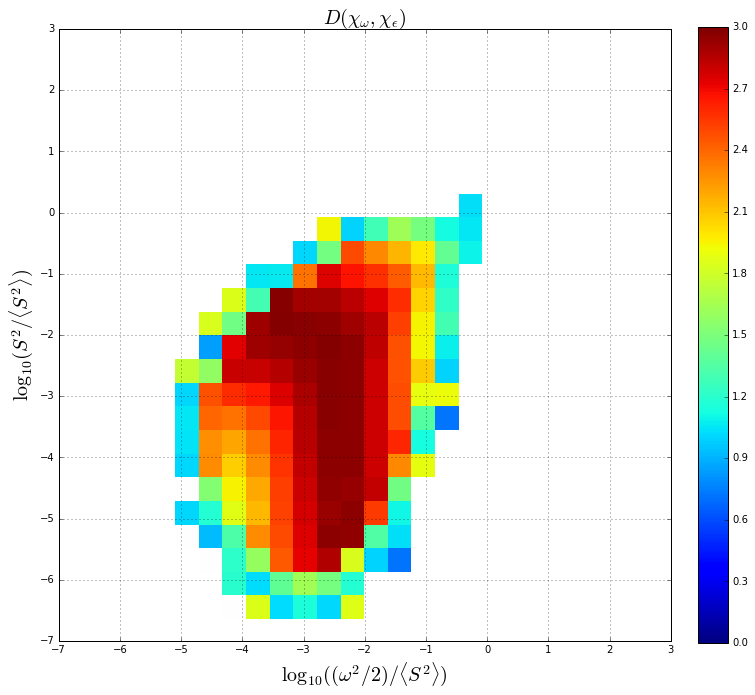

In [106]:
fig = plt.figure(figsize=(12,12))

plt.title(r'$D(\chi_\omega,\chi_\epsilon)$',size=20)
plt.ylabel(r'$\log_{10}{( S^2/\langle S^2\rangle)}$',size=20)
plt.xlabel(r'$\log_{10}{( (\omega^2/2)/\langle S^2\rangle)}$',size=20)

plt.xlim([-7.,3.])
plt.ylim([-7.,3.])

ticks = [-7,-6,-5,-4,-3,-2,-1,0,1,2,3]
plt.xticks(ticks)
plt.yticks(ticks)

plt.grid()

bmin = np.log(np.sqrt(tl[0]*tl[1])/avg)/np.log(10)
bmax = np.log(np.sqrt(tl[E_bins-2]*tl[E_bins-1])/avg)/np.log(10) 
cax = plt.imshow(pfiits,interpolation='None',extent=(bmin,bmax,bmin,bmax),origin='top',aspect='equal',vmin=0.,vmax=3.)

cbar = fig.colorbar(cax,fraction=0.046, pad=0.04)
plt.savefig('joint-dimension-computation.pdf', format='pdf')

Original version: 

In [30]:
E_bins = 115
tl = np.logspace(np.log(minJ),np.log(maxJ),num=E_bins,endpoint=True,base=np.e) 

In [31]:
print(np.log(tl/avg)/np.log(10))

[-6.84164562 -6.75681178 -6.67197794 -6.58714411 -6.50231027 -6.41747643
 -6.3326426  -6.24780876 -6.16297492 -6.07814109 -5.99330725 -5.90847341
 -5.82363958 -5.73880574 -5.6539719  -5.56913807 -5.48430423 -5.39947039
 -5.31463655 -5.22980272 -5.14496888 -5.06013504 -4.97530121 -4.89046737
 -4.80563353 -4.7207997  -4.63596586 -4.55113202 -4.46629819 -4.38146435
 -4.29663051 -4.21179667 -4.12696284 -4.042129   -3.95729516 -3.87246133
 -3.78762749 -3.70279365 -3.61795982 -3.53312598 -3.44829214 -3.36345831
 -3.27862447 -3.19379063 -3.1089568  -3.02412296 -2.93928912 -2.85445528
 -2.76962145 -2.68478761 -2.59995377 -2.51511994 -2.4302861  -2.34545226
 -2.26061843 -2.17578459 -2.09095075 -2.00611692 -1.92128308 -1.83644924
 -1.7516154  -1.66678157 -1.58194773 -1.49711389 -1.41228006 -1.32744622
 -1.24261238 -1.15777855 -1.07294471 -0.98811087 -0.90327704 -0.8184432
 -0.73360936 -0.64877553 -0.56394169 -0.47910785 -0.39427401 -0.30944018
 -0.22460634 -0.1397725  -0.05493867  0.02989517  0.

In [ ]:
start = time.time()

lcorr = []
llogr = []
volFr = []

for i in range(E_bins-1):
    start = time.time()
    print("i=",i)
    for j in range(E_bins-1):
        starti = time.time()
        
        tOm = tl[i]
        tOM = tl[i+1]
        
        tEm = tl[j]
        tEM = tl[j+1]
        
        Index = (w2>tOm)&(w2<tOM)&(S2>tEm)&(S2<tEM)
        
        chi[:,:,:] = 0
        chi[Index] = 1
        
        vf = np.average(chi)
        volFr.append(vf)
        if vf<=0.:
            corrLoc = np.zeros(rbins.shape)
            r2Loc = np.ones(rbins.shape)
        else:
            fo[:,:,:] = chi[:,:,:]
            fft_object.update_arrays(fo,bo)
            fft_object.execute()
            cchi[:,:,:] = bo[:,:,:]
            
            tmp = cchi*(cchi.conj())
            
            bo[:,:,:] = tmp[:,:,:]
            ifft_object.update_arrays(bo,fo)
            ifft_object.execute()
            corr[:,:,:] = fo[:,:,:]/(N**3)
            
            iCorr[0:(N//2),0:(N//2),0:(N//2)] = corr[0:(N//2),0:(N//2),0:(N//2)] 
            
            corrLoc,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=iCorr)
            r2Loc,r2edges  = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)
        
        lcorr.append(corrLoc)
        llogr.append(r2Loc)
        
        endi = time.time()
        print("time : "+str(endi-starti))
        
    end = time.time()
    
    print("time stripe : "+str(end-start))

time : 6.46923303604
time : 6.42110681534
time : 6.4079220295
time : 6.39931988716
time : 6.37361097336
time : 6.3634018898
time : 6.33516192436
time : 6.34528303146
time : 6.33564710617
time : 6.33508086205
time : 6.33692908287
time : 6.34298396111
time : 6.33915019035
time : 6.34094691277
time : 6.33326601982
time : 6.35112500191
time : 6.35768008232
time : 6.38223195076
time : 6.35749220848
time : 6.35418605804
time : 6.37873196602
time : 6.3542098999
time : 6.35357403755
time : 6.35416197777
time : 6.33662199974
time : 6.33764195442
time : 6.33923912048
time : 6.3317129612
time : 6.34648799896
time : 6.34328389168
time : 6.33047699928
time : 6.33561491966
time : 6.34208893776
time : 6.34088802338
time : 6.33264088631
time : 6.33749198914
time : 6.36746692657
time : 6.32179307938
time : 6.33510303497
time : 6.3328499794
time : 6.32626104355
time : 6.3258728981
time : 6.32939791679
time : 6.32329297066
time : 6.30971312523
time : 6.31372404099
time : 6.29993391037
time : 6.3078479766

time : 6.32394480705
time : 6.31873083115
time : 6.3129401207
time : 6.34948706627
time : 6.31274104118
time : 6.31552410126
time : 6.31196284294
time : 6.31301593781
time : 6.31496405602
time : 6.32292413712
time : 6.3157389164
time : 6.31715202332
time : 6.31088805199
time : 6.29111599922
time : 6.29362988472
time : 6.29167294502
time : 6.28975009918
time : 6.29747700691
time : 6.29255795479
time : 6.30553221703
time : 6.29526305199
time : 6.28558301926
time : 6.31804704666
time : 6.29302406311
time : 6.30033588409
time : 52.434910059
time : 6.3522799015
time : 6.3522310257
time : 6.33676195145
time : 6.32703280449
time : 6.34563398361
time : 6.34390592575
time : 6.31521391869
time : 6.32601499557
time : 6.31659293175
time : 6.31730389595
time : 6.32196617126
time : 6.31788110733
time : 6.31545805931
time : 6.32194805145
time : 6.31985521317
time : 6.32300686836
time : 6.32626008987
time : 6.32008481026
time : 6.31883192062
time : 6.3112039566
time : 6.29934501648
time : 6.296697855


time : 6.33545207977
time : 6.33370518684
time : 6.33545088768
time : 6.3366420269
time : 6.34497785568
time : 6.33218097687
time : 6.33038711548
time : 6.32658481598
time : 6.32806491852
time : 6.33219408989
time : 6.32688117027
time : 6.31925797462
time : 6.31208300591
time : 6.30678510666
time : 6.29822516441
time : 6.30462193489
time : 6.30815601349
time : 6.30146789551
time : 6.32656598091
time : 6.33243703842
time : 6.3175470829
time stripe : 859.71103096
time : 6.32274985313
time : 6.31798315048
time : 6.31114196777
time : 6.31433200836
time : 6.31166911125
time : 6.30882000923
time : 6.31985402107
time : 6.33109903336
time : 6.31653094292
time : 6.31307697296
time : 6.30945611
time : 6.31538200378
time : 6.30875515938
time : 6.31435394287
time : 6.30901312828
time : 6.31659007072
time : 6.31443786621
time : 6.32114100456
time : 6.30714893341
time : 6.31454396248
time : 6.31247901917
time : 6.31138396263
time : 6.30181908607
time : 6.31473207474
time : 6.30978393555
time : 6.314

time : 6.31309390068
time : 6.29973912239
time : 6.28944706917
time : 6.29793190956
time : 6.2891740799
time : 6.28969097137
time : 6.28274798393
time : 6.28674507141
time : 6.28731608391
time : 6.29663205147
time : 6.3025200367
time : 6.2974050045
time : 6.30658197403
time : 6.3147289753
time : 6.31236410141
time : 6.30938196182
time : 6.30641508102
time : 6.31648492813
time : 6.31173586845
time : 6.31472182274
time : 6.31204199791
time : 6.31502509117
time : 6.31188511848
time : 6.31607890129
time : 6.3158519268
time : 6.31478500366
time : 6.31462287903
time : 6.3263130188
time : 6.31171393394
time : 6.31857180595
time : 6.3141579628
time : 6.32675814629
time : 6.33337497711
time : 6.33031010628
time : 52.5872569084
time : 6.38206100464
time : 6.33691596985
time : 6.33700203896
time : 6.3320338726
time : 52.3197858334
time : 52.5752539635
time : 6.38563585281
time : 6.38722491264
time : 52.4547929764
time : 52.5859000683
time : 52.6897552013
time : 6.3963508606
time : 6.35841679573
t

time : 52.6649289131
time : 52.7611441612
time : 52.8027551174
time : 52.7343378067
time : 52.7263770103
time : 52.6720590591
time : 52.7735118866
time : 52.7254500389
time : 52.629319191
time : 52.6568930149
time : 52.643627882
time : 6.39914703369
time : 52.740183115
time : 6.4299659729
time : 6.41440296173
time : 6.38229203224
time : 6.37018990517
time : 6.37559700012
time : 6.36339306831
time : 6.35705804825
time : 6.34937214851
time : 6.3539390564
time : 6.35280585289
time : 6.36944103241
time : 6.35564112663
time : 6.34651303291
time : 6.32654619217
time : 6.32888412476
time : 6.32372283936
time : 6.32723522186
time : 6.32310009003
time : 6.32838487625
time : 6.32725191116
time : 6.3325688839
time : 6.32666397095
time : 6.32836008072
time : 6.33056020737
time : 6.3279709816
time : 6.32604598999
time : 6.32312583923
time : 6.34392094612
time : 6.32851314545
time : 6.33130383492
time : 6.3264708519
time stripe : 1647.40038204
time : 6.32943892479
time : 6.32810688019
time : 6.32345

time : 6.32994294167
time : 6.32273316383
time : 6.33140611649
time : 6.3268289566
time : 6.32743597031
time : 6.32281899452
time : 6.32928299904
time : 6.33065509796
time : 6.32801103592
time : 6.32449793816
time : 6.31924200058
time : 6.32066988945
time : 6.32510280609
time : 6.31673502922
time : 6.32151293755
time : 6.31909298897
time : 6.32708787918
time : 6.32152986526
time : 6.32603907585
time : 6.32231497765
time : 6.32219481468
time : 6.32349681854
time : 6.3253159523
time : 6.32238388062
time : 6.32879400253
time : 6.30228900909
time : 6.31328511238
time : 6.31242918968
time : 6.30462002754
time : 6.30096316338
time : 6.32192087173
time : 6.31043601036
time : 6.31868100166
time : 6.30262589455
time : 6.31412601471
time : 6.36281394958
time : 6.40457510948
time : 6.37877988815
time : 6.32538819313
time : 6.32123208046
time : 6.32733106613
time : 6.31713819504
time : 6.32412195206
time : 6.31945991516
time : 6.324696064
time : 6.32044792175
time : 6.32869076729
time : 6.32328009

time : 6.86381578445
time : 53.5990109444
time : 6.94828987122
time : 6.94502210617
time : 53.4801988602
time : 53.6430368423
time : 53.5387201309
time : 53.6622569561
time : 53.9052810669
time : 53.4158141613
time : 53.3021550179
time : 53.0965180397
time : 53.1787528992
time : 53.1115999222
time : 53.2599771023
time : 53.1396000385
time : 53.1149480343
time : 53.2055771351
time : 53.1892781258
time : 53.0597839355
time : 53.0896010399
time : 53.0134270191
time : 53.1380169392
time : 53.1178209782
time : 53.1151399612
time : 53.042080164
time : 53.1326408386
time : 53.1533069611
time : 53.1965811253
time : 6.55536985397
time : 6.53057384491
time : 53.2008209229
time : 53.1220459938
time : 6.48576188087
time : 6.4778418541
time : 6.48258209229
time : 6.48350405693
time : 6.4817199707
time : 6.48280596733
time : 6.4579679966
time : 6.47263884544
time : 6.45941615105
time : 6.46283102036
time : 6.46379494667
time : 6.46008682251
time : 6.46567702293
time : 6.45175909996
time : 6.45913791

time : 6.42901992798
time : 6.43052411079
time : 6.43453407288
time : 6.42834401131
time : 6.42300105095
time : 6.42841386795
time : 6.42588281631
time : 6.43621897697
time : 6.43175816536
time : 6.42744898796
time : 6.42368912697
time : 6.4194521904
time : 6.41636681557
time : 6.4208278656
time stripe : 2279.31985688
time : 6.42309093475
time : 6.43040299416
time : 6.40691995621
time : 6.40992999077
time : 6.40366482735
time : 6.40691113472
time : 6.41372489929
time : 6.40122199059
time : 6.40502405167
time : 6.39802503586
time : 6.40089583397
time : 6.40167188644
time : 6.42054486275
time : 6.4051232338
time : 6.40692186356
time : 6.40261101723
time : 6.40207409859
time : 6.40299701691
time : 6.40144705772
time : 6.40275001526
time : 6.39657306671
time : 6.40842199326
time : 6.39838504791
time : 6.40569806099
time : 6.40118002892
time : 6.40070986748
time : 6.40611600876
time : 6.40279507637
time : 6.40171909332
time : 6.39927816391
time : 6.40309214592
time : 6.4134991169
time : 6.4

time : 6.42492008209
time : 6.42418193817
time : 6.43002295494
time : 6.42227602005
time : 6.41886591911
time : 6.41323709488
time : 6.43036985397
time : 6.41191220284
time : 6.40253615379
time : 6.40142607689
time : 6.39772891998
time : 6.40187811852
time : 6.40652084351
time : 6.40979099274
time : 6.40254688263
time : 6.41837716103
time : 6.4060189724
time : 6.40968608856
time : 6.40450882912
time : 6.40355491638
time : 6.40515494347
time : 6.40482401848
time : 52.7220869064
time : 52.9518990517
time : 53.0576548576
time : 52.9650747776
time : 52.9538412094
time : 52.9936709404
time : 52.9976258278
time : 52.7490479946
time : 52.7892408371
time : 53.065279007
time : 53.0194339752
time : 53.019053936
time : 52.9622049332
time : 53.0032360554
time : 52.9478461742
time : 52.9713609219
time : 52.8786289692
time : 52.9395418167
time : 53.0141038895
time : 52.9347710609
time : 53.1937801838
time : 53.0004301071
time : 53.0091030598
time : 52.9576489925
time : 53.0720248222
time : 52.942624

time : 53.0112740993
time : 52.9164321423
time : 53.0883030891
time : 52.9731860161
time : 53.2062768936
time : 52.9192941189
time : 53.1135020256
time : 53.0092351437
time : 53.1477520466
time : 53.0880298615
time : 52.9689528942
time : 6.4779381752
time : 6.46594595909
time : 52.9815199375
time : 6.50200104713
time : 6.48199605942
time : 6.47089409828
time : 6.46156597137
time : 6.46319794655
time : 6.45837283134
time : 6.46865606308
time : 6.43159604073
time : 6.44115114212
time : 6.43201994896
time : 6.44132995605
time : 6.44569396973
time : 6.4520008564
time : 6.44129800797
time : 6.44038105011
time : 6.44380903244
time : 6.45738005638
time : 6.4435749054
time : 6.44430804253
time : 6.44146203995
time : 6.44138002396
time : 6.44366598129
time : 6.44175815582
time stripe : 2595.95616102
time : 6.44313192368
time : 6.44167590141
time : 6.44572305679
time : 6.44041705132
time : 6.44336104393
time : 6.44453597069
time : 6.42959213257
time : 6.43235993385
time : 6.43579101562
time : 6.

time : 6.39131689072
time : 6.37909817696
time : 6.36700391769
time : 6.35378909111
time : 6.35943508148
time : 6.38397622108
time : 6.47256207466
time : 6.48666501045
time : 6.49949598312
time : 6.47851800919
time : 6.501278162
time : 6.44128704071
time : 6.46341300011
time : 6.49805498123
time : 6.52156305313
time : 6.53531694412
time : 6.4996240139
time : 6.49508190155
time : 6.45836782455
time : 6.44517421722
time : 6.45029497147
time : 6.44543290138
time : 6.47506308556
time : 6.4441139698
time : 6.50650787354
time : 6.45660805702
time : 6.46769499779
time : 6.4428319931
time : 6.4258890152
time : 6.41775894165
time : 6.42059397697
time : 6.41709208488
time : 6.41271901131
time : 52.9527668953
time : 6.4788839817
time : 6.44539904594
time : 6.44979286194
time : 52.8728559017
time : 6.45661306381
time : 6.45745611191
time : 52.8124442101
time : 52.8327829838
time : 52.9075140953
time : 52.5998089314
time : 52.7127730846
time : 52.7106080055
time : 52.9431390762
time : 52.8342709541

time : 53.5234410763
time : 53.4653158188
time : 53.5875890255
time : 53.8425581455
time : 53.7482948303
time : 53.7546870708
time : 53.6859190464
time : 53.7429258823
time : 53.77977705
time : 53.8145999908
time : 53.8536179066
time : 53.8435640335
time : 53.8083620071
time : 53.9297199249
time : 53.8582470417
time : 53.9717252254
time : 53.8228909969
time : 53.5491170883
time : 53.8067388535
time : 53.7079219818
time : 53.8565471172
time : 53.9875831604
time : 53.8433279991
time : 53.8720059395
time : 53.928082943
time : 53.8067028522
time : 53.7852499485
time : 53.8481669426
time : 53.6322660446
time : 53.8364360332
time : 53.5456249714
time : 53.6674978733
time : 53.6506268978
time : 53.62845397
time : 53.5861389637
time : 53.7537531853
time : 53.7873029709
time : 53.8185780048
time : 6.49833512306
time : 6.38796615601
time : 6.47735214233
time : 6.38487195969
time : 6.45861411095
time : 6.36223101616
time : 6.45611000061
time : 6.37274885178
time : 6.45669102669
time : 6.376256942

time : 7.06793403625
time : 7.0671942234
time : 7.0748360157
time : 7.0608959198
time : 7.05579090118
time : 7.05923700333
time : 7.05255484581
time : 7.04822587967
time : 7.04862499237
time : 7.04972600937
time : 7.06185793877
time stripe : 3245.53436804
time : 7.05874705315
time : 7.05707907677
time : 7.04923892021
time : 7.05924701691
time : 7.07986092567
time : 7.05318403244
time : 7.05372714996
time : 7.04957604408
time : 7.05965399742
time : 7.0581099987
time : 7.02689313889
time : 7.02654194832
time : 7.02191901207
time : 7.03051710129
time : 7.04662322998
time : 7.05060005188
time : 7.07010793686
time : 7.07492208481
time : 7.05638098717
time : 7.04734516144
time : 7.04390287399
time : 7.04934096336
time : 7.05009007454
time : 7.04699778557
time : 7.0446639061
time : 7.05123496056
time : 7.03359413147
time : 7.02951693535
time : 7.03953504562
time : 7.04275083542
time : 7.04453802109
time : 7.04146289825
time : 7.04105520248
time : 7.07315206528
time : 7.04958295822
time : 7.04

time : 7.05846810341
time : 7.05514097214
time : 7.04245185852
time : 7.03004312515
time : 7.03088593483
time : 7.03272008896
time : 53.7491559982
time : 7.15102505684
time : 54.0226588249
time : 54.0064208508
time : 54.0862681866
time : 54.098539114
time : 53.7567980289
time : 53.8073470592
time : 54.0490410328
time : 53.8372540474
time : 53.9034500122
time : 54.0706880093
time : 53.939841032
time : 53.9194850922
time : 53.9830670357
time : 53.8767039776
time : 53.9442448616
time : 54.0406048298
time : 54.2103300095
time : 53.9422187805
time : 54.0054380894
time : 53.9675788879
time : 53.9285719395
time : 53.9747190475
time : 54.0439178944
time : 53.9414269924
time : 54.042071104
time : 54.0142760277
time : 53.8816478252
time : 54.0831739902
time : 54.0959451199
time : 54.1214351654
time : 54.1055860519
time : 53.8843958378
time : 54.0026860237
time : 54.0246269703
time : 54.0785250664
time : 54.0745618343
time : 54.1791620255
time : 54.2393960953
time : 54.0822849274
time : 54.034642

time : 54.1187961102
time : 54.1100449562
time : 54.0626010895
time : 54.09116292
time : 54.0065817833
time : 54.0517201424
time : 53.9118528366
time : 53.8337049484
time : 53.9261689186
time : 54.0059499741
time : 54.0542759895
time : 53.9869298935
time : 54.075606823
time : 54.1215720177
time : 54.1019690037
time : 54.0572450161
time : 7.11406087875
time : 7.11556482315
time : 7.11186599731
time : 7.11656904221
time : 7.11347913742
time : 7.1066839695
time : 7.10460686684
time : 7.07978415489
time : 7.06305098534
time : 7.06081700325
time : 7.07489705086
time : 7.08392977715
time : 7.07520890236
time : 7.07146286964
time : 7.07074809074
time : 7.06802821159
time : 7.07177090645
time : 7.07491087914
time stripe : 3345.14056492
time : 7.0884771347
time : 7.06921195984
time : 7.08928894997
time : 7.07174015045
time : 7.07428383827
time : 7.06995606422
time : 7.07023096085
time : 7.07190799713
time : 7.06853294373
time : 7.07004618645
time : 7.07038402557
time : 7.05772805214
time : 7.05

time : 7.0706589222
time : 7.06451797485
time : 7.07514977455
time : 7.0714058876
time : 7.05697202682
time : 7.05164003372
time : 7.05586194992
time : 7.03789901733
time : 7.03073906898
time : 7.03935098648
time : 7.04267907143
time : 7.03531599045
time : 7.03760695457
time : 7.03351688385
time : 7.03735613823
time : 7.03635811806
time : 7.03315806389
time : 7.05720901489
time : 7.03637099266
time : 7.0239610672
time : 7.03137016296
time : 7.02758216858
time : 7.0332300663
time : 7.03503298759
time : 7.0589389801
time : 7.08822703362
time : 53.9402811527
time : 54.0304031372
time : 54.196447134
time : 54.0334401131
time : 54.0353310108
time : 54.2054259777
time : 54.0371158123
time : 53.9140241146
time : 54.0502779484
time : 54.1760349274
time : 54.1440329552
time : 54.1032910347
time : 54.0899820328
time : 54.0106129646
time : 54.1738870144
time : 54.2142419815
time : 54.1021080017
time : 54.1005539894
time : 54.011619091
time : 54.2192790508
time : 54.1862370968
time : 54.1534879208

time : 54.0003950596
time : 54.1736690998
time : 54.1098229885
time : 54.0534088612
time : 54.0921561718
time : 54.0394468307
time : 53.9227159023
time : 53.8244700432
time : 53.9072651863
time : 53.8990499973
time : 53.9612779617
time : 53.9584779739
time : 53.9727349281
time : 53.9520068169
time : 53.9666600227
time : 53.8536589146
time : 53.7344121933
time : 53.8223679066
time : 54.0666589737
time : 53.9741649628
time : 54.0425510406
time : 53.9862968922
time : 53.8633861542
time : 54.1010499001
time : 53.8964369297
time : 53.9742732048
time : 53.8896670341
time : 54.0342898369
time : 53.7949008942
time : 53.8446390629
time : 53.7889969349
time : 53.8338868618
time : 53.9991328716
time : 53.8864121437
time : 55.750772953
time : 55.4397399426
time : 54.1479849815
time : 54.1730620861
time : 54.5313129425
time : 6.39778995514
time : 6.512830019
time : 6.38380503654
time : 6.48233795166
time : 6.38662099838
time : 6.49497008324
time : 6.39023709297
time : 6.49087405205
time : 6.3780128

time : 7.11248397827
time : 7.10684394836
time : 7.11115407944
time : 7.11276316643
time : 7.10570883751
time : 7.10190486908
time : 7.10169291496
time : 7.09619617462
time stripe : 3766.36145401
time : 7.09724092484
time : 7.09490394592
time : 7.0932559967
time : 7.0956389904
time : 7.1037940979
time : 7.0985929966
time : 7.09658694267
time : 7.09683799744
time : 7.08718705177
time : 7.09140706062
time : 7.08986902237
time : 7.08931207657
time : 7.10301089287
time : 7.09381389618
time : 7.0975830555
time : 7.09095692635
time : 7.09082484245
time : 7.0979449749
time : 7.09013104439
time : 7.08846688271
time : 7.10098791122
time : 7.09253311157
time : 7.10116887093
time : 7.09094500542
time : 7.08657598495
time : 7.08709406853
time : 7.08764791489
time : 7.08033895493
time : 7.07846808434
time : 7.11631894112
time : 7.11021590233
time : 7.05994915962
time : 7.06418514252
time : 53.9017260075
time : 7.11811709404
time : 53.9087200165
time : 54.0620629787
time : 7.15106391907
time : 53.88

time : 7.14694595337
time : 53.9798939228
time : 54.0484828949
time : 54.0712480545
time : 54.010614872
time : 54.2495558262
time : 54.055398941
time : 54.1076519489
time : 53.9426000118
time : 53.9302761555
time : 53.9454641342
time : 54.1242289543
time : 53.9593348503
time : 54.040060997
time : 53.9628391266
time : 54.1001238823
time : 53.9903359413
time : 54.0492930412
time : 54.111935854
time : 53.934664011
time : 53.9929070473
time : 53.8758471012
time : 54.052628994
time : 54.0233418941
time : 54.1999769211
time : 53.8952660561
time : 53.9735291004
time : 53.9759941101
time : 53.9401831627
time : 53.9730050564
time : 53.9218859673
time : 53.9791791439
time : 54.0416719913
time : 54.0919919014
time : 54.1005880833
time : 54.0974900723
time : 54.1053299904
time : 53.961771965
time : 53.8431880474
time : 54.085367918
time : 54.0581650734
time : 53.9644229412
time : 54.0146391392
time : 54.0169069767
time : 54.1993660927
time : 54.1076099873
time : 54.2179319859
time : 54.0601329803


time : 54.142138958
time : 53.8962860107
time : 53.961316824
time : 54.084182024
time : 54.4613969326
time : 54.0064780712
time : 54.0263049603
time : 54.0694758892
time : 57.0523529053
time : 57.1807649136
time : 53.9101850986
time : 54.1782979965
time : 54.2530331612
time : 54.1172320843
time : 54.03266716
time : 54.0447258949
time : 53.9957048893
time : 7.13847613335
time : 53.7947230339
time : 7.1041829586
time : 7.09573793411
time : 7.0948331356
time : 7.08073401451
time : 7.08155703545
time : 7.08537602425
time : 7.07734584808
time : 7.07229304314
time : 7.08218812943
time : 7.07760620117
time : 7.08146882057
time : 7.07664608955
time stripe : 4006.29437709
time : 7.07474088669
time : 7.06985998154
time : 7.06818604469
time : 7.07503890991
time : 7.0788269043
time : 7.06314706802
time : 7.06938886642
time : 7.06581807137
time : 7.0673699379
time : 7.08422088623
time : 7.07794284821
time : 7.08616900444
time : 7.08866715431
time : 7.09158277512
time : 7.08081698418
time : 7.063815

time : 7.0479991436
time : 7.04656982422
time : 7.0398440361
time : 7.05294108391
time : 7.05074119568
time : 7.03436398506
time : 7.02881193161
time : 7.02603602409
time : 7.02509593964
time : 7.03396916389
time : 7.02908706665
time : 7.02868700027
time : 7.04339694977
time : 7.03413796425
time : 7.03360295296
time : 53.4566729069
time : 7.08668804169
time : 7.08203196526
time : 53.8721120358
time : 7.08765912056
time : 7.0860080719
time : 53.9254310131
time : 54.0345129967
time : 53.9108757973
time : 53.878098011
time : 53.9567699432
time : 54.0298690796
time : 53.8491199017
time : 53.9202680588
time : 54.0098071098
time : 53.928592205
time : 53.9725270271
time : 53.950576067
time : 53.8302350044
time : 54.0250430107
time : 54.0610129833
time : 54.0491471291
time : 53.9696888924
time : 54.0487959385
time : 53.884968996
time : 53.8928980827
time : 53.9303159714
time : 53.8840727806
time : 53.9663779736
time : 53.8171710968
time : 53.7939369678
time : 54.0376861095
time : 53.8719592094

time : 53.9445178509
time : 53.9132430553
time : 54.0074279308
time : 53.9774250984
time : 53.997754097
time : 54.2251019478
time : 53.9538049698
time : 54.018351078
time : 53.9829399586
time : 54.1349878311
time : 54.0904898643
time : 54.258081913
time : 54.2782399654
time : 54.3740339279
time : 54.3983809948
time : 54.3490450382
time : 54.1896269321
time : 54.274392128
time : 56.8184258938
time : 54.1648631096
time : 54.1225941181
time : 54.0750410557
time : 54.1609470844
time : 54.1791160107
time : 54.2579128742
time : 54.0669031143
time : 53.9774599075
time : 53.9147281647
time : 54.0319731236
time : 54.1039550304
time : 53.9086170197
time : 53.8968658447
time : 53.9261291027
time : 53.8599450588
time : 53.7870140076
time : 54.0561931133
time : 54.1321849823
time : 54.1812109947
time : 54.1907918453
time : 7.14283299446
time : 7.13239622116
time : 54.0171120167
time : 7.10470604897
time : 7.08903288841
time : 7.08974099159
time : 7.09941601753
time : 7.08836007118
time : 7.09239196

time : 7.05835199356
time : 7.06097197533
time : 7.05759596825
time : 7.05269289017
time : 7.05401802063
time : 7.04731488228
time stripe : 4005.02929807
time : 7.0860888958
time : 7.05567908287
time : 7.06126213074
time : 7.05603504181
time : 7.05765485764
time : 7.04859209061
time : 7.04734683037
time : 7.04474020004
time : 7.04498505592
time : 7.07097601891
time : 7.05167603493
time : 7.04861497879
time : 7.03301215172
time : 7.02984189987
time : 7.04584288597
time : 7.03283596039
time : 7.04820489883
time : 7.05591988564
time : 7.05363607407
time : 7.05208206177
time : 7.05534100533
time : 7.05406594276
time : 7.04405212402
time : 7.04871582985
time : 7.0559220314
time : 7.04301095009
time : 7.06345200539
time : 7.04905986786
time : 7.05054283142
time : 7.04396009445
time : 7.04978299141
time : 7.04735708237
time : 7.05359196663
time : 7.04335308075
time : 7.06082487106
time : 7.04954195023
time : 53.9714529514
time : 53.9219720364
time : 54.2902491093
time : 54.0435512066
time : 5

time : 53.9995751381
time : 7.12792801857
time : 54.1157329082
time : 54.1254301071
time : 53.8560421467
time : 53.8862810135
time : 54.1418778896
time : 54.1354470253
time : 54.2173938751
time : 54.2078149319
time : 54.2553529739
time : 54.0506980419
time : 54.1199531555
time : 54.1876289845
time : 54.2315211296
time : 54.1462609768
time : 53.9725739956
time : 54.1211659908
time : 54.1316871643
time : 54.162498951
time : 54.1931090355
time : 54.1533849239
time : 54.07279706
time : 53.8787670135
time : 54.0126020908
time : 53.9580051899
time : 54.0514268875
time : 54.0746011734
time : 54.1119999886
time : 54.2472250462
time : 54.1460001469
time : 54.2098670006
time : 54.2538311481
time : 54.2080368996
time : 54.1746661663
time : 54.2474219799
time : 54.1930069923
time : 54.4867019653
time : 54.4935541153
time : 54.411907196
time : 54.2829909325
time : 54.4251430035
time : 54.2891039848
time : 54.1895399094
time : 54.2603540421
time : 54.2840468884
time : 54.078868866
time : 54.21666812

time : 54.1116290092
time : 56.1169691086
time : 53.6739649773
time : 53.7065410614
time : 53.5780780315
time : 53.7069408894
time : 53.873663187
time : 54.3196558952
time : 54.0651950836
time : 53.9907548428
time : 54.023720026
time : 54.1234447956
time : 54.0371940136
time : 54.0996098518
time : 54.2303669453
time : 54.1953909397
time : 54.0726318359
time : 54.1205339432
time : 54.1043000221
time : 7.1446621418
time : 7.15802407265
time : 7.13749694824
time : 7.13685703278
time : 7.1288049221
time : 7.13199901581
time : 7.13217306137
time : 7.11505293846
time : 7.10485506058
time stripe : 3864.41215301
time : 7.07740592957
time : 7.07145500183
time : 7.08124399185
time : 7.07809901237
time : 7.07884383202
time : 7.07062792778
time : 7.06248688698
time : 7.06170582771
time : 7.05809402466
time : 7.06672787666
time : 7.05786299706
time : 7.0549659729
time : 7.04615497589
time : 7.04980301857
time : 7.05434203148
time : 7.05129599571
time : 7.06388378143
time : 7.05389308929
time : 7.05

time : 7.07413816452
time : 7.07444787025
time : 7.07547020912
time : 7.072961092
time : 7.08177804947
time : 7.07199192047
time : 7.07353901863
time : 7.07713007927
time : 7.07315087318
time : 7.06948804855
time : 7.07586979866
time : 7.07561182976
time : 7.07760596275
time : 7.07991695404
time : 7.07356905937
time : 7.07855510712
time : 7.07380914688
time : 7.07742500305
time : 7.07208895683
time : 7.07782721519
time : 7.07121706009
time : 7.08166408539
time : 7.06961894035
time : 7.07493114471
time : 7.05475687981
time : 7.06020617485
time : 7.05445098877
time : 7.06855010986
time : 53.9076058865
time : 53.8536758423
time : 54.0961129665
time : 54.0719459057
time : 53.9944679737
time : 53.9963610172
time : 53.9854500294
time : 53.9009878635
time : 53.9404392242
time : 53.9303181171
time : 54.0457100868
time : 54.0994639397
time : 54.0718109608
time : 54.1051230431
time : 53.9889380932
time : 54.0723388195
time : 53.9541788101
time : 53.9187719822
time : 54.0213530064
time : 53.94662

time : 54.1283729076
time : 54.1157188416
time : 54.1605050564
time : 54.2046539783
time : 54.1044001579
time : 54.2273700237
time : 54.1688148975
time : 54.1159789562
time : 54.197453022
time : 54.3291590214
time : 54.1446361542
time : 54.2265839577
time : 54.1338119507
time : 54.1462020874
time : 54.0338971615
time : 54.1032829285
time : 54.2723021507
time : 54.2134549618
time : 54.2460820675
time : 54.1569879055
time : 54.1183161736
time : 54.6972680092
time : 54.0097420216
time : 54.255022049
time : 54.0599770546
time : 54.3435709476
time : 54.1918849945
time : 54.1264162064
time : 54.1678841114
time : 54.3307070732
time : 54.2364161015
time : 54.1964628696
time : 54.0238389969
time : 54.0346348286
time : 53.9921140671
time : 54.1918928623
time : 54.1350579262
time : 54.1059830189
time : 54.247795105
time : 54.0685482025
time : 54.1258158684
time : 7.10259008408
time : 7.08822894096
time : 7.10244011879
time : 7.10051298141
time : 7.10094809532
time : 7.09042906761
time : 7.0984160

time : 7.09208416939
time : 7.08398389816
time : 7.08864188194
time : 7.0980091095
time stripe : 3532.7930131
time : 7.09913301468
time : 7.088752985
time : 7.08111691475
time : 7.08475494385
time : 7.10326218605
time : 7.08823084831
time : 7.0942800045
time : 7.08627295494
time : 7.08778190613
time : 7.07281303406
time : 7.07017683983
time : 7.06365919113
time : 7.07546710968
time : 7.07214307785
time : 7.06671786308
time : 7.07540202141
time : 7.07634806633
time : 7.06290197372
time : 7.06435608864
time : 7.06174397469
time : 7.08904099464
time : 7.09168195724
time : 7.08512687683
time : 7.07327198982
time : 7.06357312202
time : 7.05902290344
time : 7.06325602531
time : 7.05565094948
time : 7.0648958683
time : 7.10922312737
time : 7.06490898132
time : 7.0579559803
time : 7.06001806259
time : 7.05774903297
time : 7.06580519676
time : 7.06460809708
time : 7.06322097778
time : 7.07416987419
time : 7.09047913551
time : 7.08417391777
time : 7.08412098885
time : 7.08528590202
time : 7.0819

time : 7.05386590958
time : 7.0518450737
time : 7.04790902138
time : 7.04873991013
time : 7.04872703552
time : 7.04808115959
time : 7.04602599144
time : 7.04680395126
time : 7.06243300438
time : 7.04799079895
time : 53.6277990341
time : 7.06863713264
time : 7.06974291801
time : 53.9020729065
time : 54.0042600632
time : 54.2432308197
time : 7.17673516273
time : 54.0420780182
time : 54.1253008842
time : 53.9913668633
time : 53.8344099522
time : 57.2621099949
time : 60.8187830448
time : 64.7470068932
time : 64.6793401241
time : 64.6157019138
time : 64.7518129349
time : 64.6755669117
time : 64.9558479786
time : 64.6096420288
time : 64.3932788372
time : 64.4118099213
time : 61.7272789478
time : 53.9126360416
time : 54.0909259319
time : 54.0213990211
time : 54.6226680279
time : 53.9449768066
time : 53.8693051338
time : 53.9174568653
time : 54.1146430969
time : 54.012898922
time : 58.826777935
time : 54.5845041275
time : 54.3115670681
time : 54.2571260929
time : 54.3098289967
time : 54.221107

time : 54.0077331066
time : 54.2066059113
time : 54.1036198139
time : 53.9898939133
time : 54.1994731426
time : 54.2397530079
time : 54.2807149887
time : 54.2179880142
time : 54.2376601696
time : 54.1729319096
time : 54.2173449993
time : 54.3000519276
time : 54.2193658352
time : 54.0504050255
time : 54.1680719852
time : 54.1699841022
time : 54.2751019001
time : 54.068693161
time : 54.0435240269
time : 7.10590314865
time : 7.09052300453
time : 7.07928800583
time : 7.07618999481
time : 7.07910704613
time : 7.07630300522
time : 7.08067393303
time stripe : 3018.44347811
time : 7.07259488106
time : 7.06642794609
time : 7.06953406334
time : 7.06740880013
time : 7.07086801529
time : 7.06709980965
time : 7.06862092018
time : 7.06152915955
time : 7.06031489372
time : 7.05290102959
time : 7.04626584053
time : 7.0538020134
time : 7.04979205132
time : 7.05108809471
time : 7.04883718491
time : 7.0472381115
time : 7.06790399551
time : 7.05018496513
time : 7.04919505119
time : 7.05103516579
time : 7.

time : 7.07206511497
time : 7.08633184433
time : 7.08447289467
time : 7.08373403549
time : 7.08232283592
time : 7.08067989349
time : 7.07554984093
time : 7.07560801506
time : 7.08148813248
time : 7.07888817787
time : 7.07877898216
time : 7.08225893974
time : 7.07727599144
time : 7.06759881973
time : 7.07401299477
time : 7.06519889832
time : 7.06516504288
time : 7.05502009392
time : 7.04794812202
time : 7.05304217339
time : 7.04744315147
time : 7.04906511307
time : 7.04558897018
time : 7.04730010033
time : 7.04723501205
time : 7.04788398743
time : 7.04217910767
time : 7.02801299095
time : 7.02564692497
time : 7.02945208549
time : 7.02458286285
time : 7.02752494812
time : 7.03027820587
time : 7.02771997452
time : 7.02940797806
time : 7.02741098404
time : 7.02853798866
time : 7.02625203133
time : 7.02876591682
time : 7.03044486046
time : 7.02917695045
time : 7.02825307846
time : 7.0342400074
time : 7.06062984467
time : 7.03021407127
time : 7.02310609818
time : 53.7343189716
time : 53.8327

time : 7.04982304573
time : 7.05197787285
time : 54.3403530121
time : 54.1486330032
time : 53.9816131592
time : 54.148555994
time : 58.9710009098
time : 54.2957220078
time : 54.1910588741
time : 53.9844360352
time : 54.0154309273
time : 54.2294490337
time : 54.1719388962
time : 54.047960043
time : 54.1818630695
time : 54.095676899
time : 54.0473821163
time : 54.0693011284
time : 54.3127348423
time : 54.4050819874
time : 54.1815919876
time : 54.1958649158
time : 54.1516900063
time : 54.2177560329
time : 54.2197170258
time : 54.2369480133
time : 54.2326080799
time : 54.1600849628
time : 54.1745929718
time : 54.1656849384
time : 54.225883007
time : 54.1884789467
time : 53.9958469868
time : 54.0142850876
time : 54.0275850296
time : 54.0371930599
time : 54.1227009296
time : 54.0940768719
time : 54.00770998
time : 54.0073728561
time : 54.088465929
time : 7.13234400749
time : 7.11766600609
time : 7.11666488647
time : 7.13878297806
time : 7.12185811996
time : 7.12445521355
time stripe : 2646.4

time : 7.11506700516
time stripe : 2215.07651496
time : 7.09508490562
time : 7.0952539444
time : 7.09168291092
time : 7.09337687492
time : 7.09431791306
time : 7.0984120369
time : 7.09158611298
time : 7.09861302376
time : 7.0844669342
time : 7.09317493439
time : 7.08837890625
time : 7.09334683418
time : 7.08975791931
time : 7.09730505943
time : 7.12840795517
time : 7.09603118896
time : 7.08738994598
time : 7.09352183342
time : 7.08972001076
time : 7.09492993355
time : 7.0898399353
time : 7.08695602417
time : 7.10866117477
time : 7.09892606735
time : 7.09155201912
time : 7.09877490997
time : 7.08538413048
time : 7.08586907387
time : 7.09245610237
time : 7.09211802483
time : 7.09416794777
time : 7.09585404396
time : 7.09461212158
time : 7.09900093079
time : 7.09143209457
time : 7.09666895866
time : 7.08803606033
time : 7.08846402168
time : 7.08902692795
time : 7.09814500809
time : 7.09221196175
time : 7.08840894699
time : 7.07836508751
time : 7.08216285706
time : 7.07754206657
time : 7.0

time : 7.06707119942
time : 7.072961092
time : 7.06886482239
time : 7.06946110725
time : 7.06609296799
time : 7.06798887253
time : 7.06633281708
time : 7.06719303131
time : 7.05799007416
time : 7.04440402985
time : 7.05381011963
time : 7.04249310493
time : 7.045181036
time : 7.05561518669
time : 7.05051589012
time : 7.06510210037
time : 7.04446983337
time : 7.05181002617
time : 7.05116295815
time : 7.04801893234
time : 7.04811191559
time : 7.04474806786
time : 7.04574584961
time : 7.04758906364
time : 7.04332685471
time : 7.04674100876
time : 7.0410990715
time : 7.06695699692
time : 7.04746603966
time : 7.04113197327
time : 7.04335713387
time : 7.04316997528
time : 7.04229688644
time : 7.04109811783
time : 7.04046607018
time : 7.04848194122
time : 7.04531598091
time : 7.05243611336
time : 7.04634690285
time : 7.05931091309
time : 7.06068086624
time : 7.04629087448
time : 7.04597997665
time : 7.03961920738
time : 7.05720210075
time : 7.04600691795
time : 7.0457880497
time : 7.0726618766

In [ ]:
eta = 0.00280

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

fiits = []    
for i in range(E_bins-1):
    for j in range(E_bins-1):
        tOm = tl[i]
        tOM = tl[i+1]
        
        tEm = tl[j]
        tEM = tl[j+1]
        
        if(volFr[i*(E_bins-1)+j]>0):
            corrF = lcorr[i*(E_bins-1)+j]/llogr[i*(E_bins-1)+j]
            
            tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
            idx = tempCorrF>0
            
            if(len(tempCorrF[idx])>0):
                fit = np.polyfit(np.log(tempRp[idx]),np.log(tempCorrF[idx]/corrF[0]),1)
            else:
                fit = np.array([-3,0])
        else:
            fit = np.array([-3,0])
            
        fiits.append(fit[0])
        print('t = ({one:.7f},{two:.7f})*sigma_2: Linear fit [alpha A] = {tree:.3f}'.format(one=np.log(np.sqrt(tOm*tOM)/avg)/np.log(10),two=np.log(np.sqrt(tEm*tEM)/avg)/np.log(10),tree=fit[0]+3))
    
fiits = np.array(fiits)

In [ ]:
fig = plt.figure(figsize=(12,12))

plt.title(r'$D(\chi_\omega,\chi_\epsilon)$',size=20)
plt.ylabel(r'$\log_{10}{( S^2/\langle S^2\rangle)}$',size=20)
plt.xlabel(r'$\log_{10}{( (\omega^2/2)/\langle S^2\rangle)}$',size=20)

plt.xlim([-7.,3.])
plt.ylim([-7.,3.])

ticks = [-7,-6,-5,-4,-3,-2,-1,0,1,2,3]
plt.xticks(ticks)
plt.yticks(ticks)

plt.grid()

bmin = np.log(np.sqrt(tl[0]*tl[1])/avg)/np.log(10)
bmax = np.log(np.sqrt(tl[E_bins-2]*tl[E_bins-1])/avg)/np.log(10) 
cax = plt.imshow(pfiits,interpolation='None',extent=(bmin,bmax,bmin,bmax),origin='top',aspect='equal',vmin=0.,vmax=3.)

cbar = fig.colorbar(cax,fraction=0.046, pad=0.04)
plt.savefig('joint-dimension-computation.pdf', format='pdf')